<a href="https://colab.research.google.com/github/karolrrcampos/imersao-dados-IA-Alura/blob/main/Manipula%C3%A7%C3%A3o_de_Planilhas_com_Python_Pandas_e_o_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Planilha dados Amazon**

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from forex_python.converter import CurrencyRates
import time
import re
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# Importando o dataset dados
dados = pd.read_csv('/content/dados.csv')

In [ ]:
# Importando o dataset avaliacoes
avaliacoes = pd.read_csv('/content/avaliacoes.csv')

In [ ]:
dados.head(3)

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹1.899,00","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [ ]:
avaliacoes.head(3)

,product_id,user_id,user_name,review_id,review_title,review_content,img_link
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...


## **Data Wrangling e Análise dos Dados**

In [ ]:
# Removendo as colunas que não serão usadas
dados = dados.drop(columns=['about_product', 'product_link', 'product_name'])

In [ ]:
avaliacoes = avaliacoes.drop(columns=['user_id', 'user_name', 'img_link', 'review_id'])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     1465 non-null   object
 1   category       1465 non-null   object
 2   actual_price   1465 non-null   object
 3   product_price  1465 non-null   object
 4   rating         1465 non-null   object
 5   rating_count   1465 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 68.8+ KB


In [ ]:
avaliacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1465 non-null   object
 1   review_title    1465 non-null   object
 2   review_content  1465 non-null   object
dtypes: object(3)
memory usage: 34.5+ KB


In [ ]:
# Eliminar o simbolo da rupia e os pontos e substituir virgula por ponto (juntou três funções em uma só pra economizar linha de código)
dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
# Convertendo a coluna para o tipo numérico
dados['product_price'] = pd.to_numeric(dados['product_price'])
# Exibindo os primeiros registros após a alteração
dados.head()

<ipython-input-14-8b069a7a77c0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['product_price'] = dados['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


,product_id,category,actual_price,product_price,rating,rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,"₹399,00",1099.0,"4,5",24269
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,"₹199,00",349.0,4,43994
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,"₹199,00",1899.0,"4,52",7928
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,"₹329,00",699.0,"4,5",94363
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,"₹154,00",399.0,"4,5",16905


In [ ]:
dados['actual_price'] = dados['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
dados['actual_price'] = pd.to_numeric(dados['actual_price'])
dados.head()

<ipython-input-15-f5fbd1560c7c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


,product_id,category,actual_price,product_price,rating,rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,"4,5",24269
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,4,43994
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,"4,52",7928
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,"4,5",94363
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,"4,5",16905


In [ ]:
# transformar virgulas em pontos
dados['rating'] = dados['rating'].str.replace(',', '.')
# Convertendo a coluna para o tipo numérico
dados['rating'] = pd.to_numeric(dados['rating'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     1465 non-null   object 
 1   category       1465 non-null   object 
 2   actual_price   1465 non-null   float64
 3   product_price  1465 non-null   float64
 4   rating         1465 non-null   float64
 5   rating_count   1465 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 68.8+ KB


In [ ]:
# Resumo estatístico das colunas numéricas
dados.describe()

,actual_price,product_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1.465000e+03
mean,3077.617693,5365.248840,4.432198,2.166947e+04
std,6860.277463,10743.796284,0.226138,9.132905e+04
min,2.500000,38.000000,0.000000,0.000000e+00
25%,314.000000,800.000000,4.490000,9.100000e+02
50%,799.000000,1645.000000,4.500000,4.003000e+03
75%,1999.000000,4199.000000,4.510000,1.466700e+04
max,77990.000000,139900.000000,5.000000,2.051952e+06


In [ ]:
# Função para criar uma subcategoria a partir da variável "category"
def extrair_sub_categoria(texto):
    if "|" in texto:
        return texto.split("|")[1]
    else:
        return None

dados['sub_categoria'] = dados['category'].apply(extrair_sub_categoria)
dados = dados[['product_id', 'category', 'sub_categoria', 'actual_price', 'product_price', 'rating', 'rating_count']]
dados.head()

,product_id,category,sub_categoria,actual_price,product_price,rating,rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,4.50,24269
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,4.00,43994
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,4.52,7928
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,4.50,94363
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,4.50,16905


In [ ]:
# calculo do valor percentual de desconto
dados['percent_desconto'] = ((dados['actual_price'] - dados['product_price']) / dados['product_price']) * -100
dados['percent_desconto'] = round(dados['percent_desconto'], 2).astype(str) + '%'
dados = dados[['product_id', 'category', 'sub_categoria', 'actual_price', 'product_price', 'percent_desconto', 'rating', 'rating_count']]
dados.head()

,product_id,category,sub_categoria,actual_price,product_price,percent_desconto,rating,rating_count
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,63.69%,4.50,24269
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,42.98%,4.00,43994
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,89.52%,4.52,7928
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,52.93%,4.50,94363
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,61.4%,4.50,16905


> **Para conversão da Rúpia Indiana em Real, irei instalar um pacote chamado 'forex-python', que fornece a taxa de cambio de conversão de moeda.**

In [ ]:
# Função para obter a cotação da Rúpia Indiana para o Real Brasileiro
def get_inr_to_brl_exchange_rate():
    c = CurrencyRates()
    try:
        exchange_rate = c.get_rate('INR', 'BRL')
        return exchange_rate
    except Exception as e:
        print(f"Erro ao obter a cotação: {e}")
        return None

exchange_rate = get_inr_to_brl_exchange_rate()

# Verifica se a taxa de câmbio foi obtida com sucesso
if exchange_rate is not None:
    # Multiplica a coluna 'actual_price' pelo valor da taxa de câmbio
    dados['preco_atual_R$'] = dados['actual_price'] * exchange_rate

In [ ]:
dados.head()

,product_id,category,sub_categoria,actual_price,product_price,percent_desconto,rating,rating_count,preco_atual_R$
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,63.69%,4.50,24269,23.560799
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,42.98%,4.00,43994,11.750875
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,89.52%,4.52,7928,11.750875
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,52.93%,4.50,94363,19.427325
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,61.4%,4.50,16905,9.093642


In [ ]:
# Arredondar o valor para duas casas após a virgula
dados['preco_atual_R$'] = 'R$' + round(dados['preco_atual_R$'], 2).astype(str)
# alterar a ordem da nova variável
dados = dados[['product_id', 'category', 'sub_categoria', 'actual_price', 'product_price', 'percent_desconto', 'preco_atual_R$', 'rating', 'rating_count']]

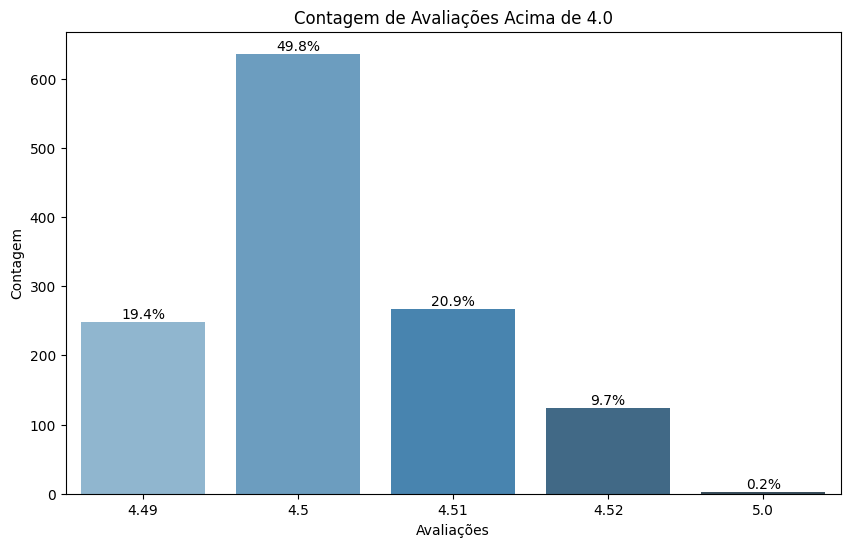

In [ ]:
# Gráfico de barras com o percentual das avaliações acima de 4
# Filtra as avaliações com nota acima de 4.0
ratings_above_4_0 = dados[dados['rating'] > 4.0]

# Calcula a contagem das avaliações por nota
rating_counts = ratings_above_4_0['rating'].value_counts().sort_index()

# Calcula os valores percentuais
total_count = len(ratings_above_4_0)
percentual_values = [(count / total_count) * 100 for count in rating_counts]

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Blues_d")
plt.title('Contagem de Avaliações Acima de 4.0')
plt.xlabel('Avaliações')
plt.ylabel('Contagem')

# Adiciona os valores percentuais ao gráfico
for i, percentual in enumerate(percentual_values):
    plt.text(i, rating_counts.values[i] + 5, f'{percentual:.1f}%', ha='center')

plt.show()

> **Agora irei criar um novo data frame para transferir as variáveis 'review_id' e 'review_title' para o dataset 'dados'**

In [ ]:
avaliacoes = avaliacoes.drop_duplicates(subset='product_id')

# Realize a junção, mantendo todas as colunas de "dados" e apenas as colunas "review_title" e "review_content" de "avaliacoes"
df = pd.merge(dados, avaliacoes[['product_id', 'review_title', 'review_content']], on='product_id', how='left')

df.head()

,product_id,category,sub_categoria,actual_price,product_price,percent_desconto,preco_atual_R$,rating,rating_count,review_title,review_content
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,63.69%,R$23.56,4.50,24269,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,42.98%,R$11.75,4.00,43994,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,89.52%,R$11.75,4.52,7928,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,52.93%,R$19.43,4.50,94363,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,61.4%,R$9.09,4.50,16905,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


> **Remover os caracteres, espaços duplos e emojis das variáveis "review_title" e "review_content"**

In [ ]:
def limpar_review_title(review_title):
    # Remove caracteres especiais, números e espaços duplos
    review_title = re.sub(r'[^a-zA-ZÀ-ú\s]', '', review_title)
    review_title = re.sub(r'\s+', ' ', review_title).strip()

    # Remove emojis
    review_title = review_title.encode('ascii', 'ignore').decode('ascii')

    return review_title

df['title'] = df['review_title'].apply(limpar_review_title)
df['review'] = df['review_content'].apply(limpar_review_title)

df.head()

,product_id,category,sub_categoria,actual_price,product_price,percent_desconto,preco_atual_R$,rating,rating_count,review_title,review_content,title,review
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,63.69%,R$23.56,4.50,24269,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,42.98%,R$11.75,4.00,43994,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,89.52%,R$11.75,4.52,7928,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttpsmmediaamazonc...
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,52.93%,R$19.43,4.50,94363,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,61.4%,R$9.09,4.50,16905,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...


> **Análise de sentimento das variáveis "title" e "review"**

In [ ]:
def analisar_sentimento(texto):
    analysis = TextBlob(texto)
    # Classifica o sentimento como 'positivo', 'negativo' ou 'neutro'
    if analysis.sentiment.polarity > 0:
        return 'positivo'
    elif analysis.sentiment.polarity < 0:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar a função de análise de sentimento às colunas "title" e "review"
df['sentimento_title'] = df['title'].apply(analisar_sentimento)
df['sentimento_review'] = df['review'].apply(analisar_sentimento)

df.head()

,product_id,category,sub_categoria,actual_price,product_price,percent_desconto,preco_atual_R$,rating,rating_count,review_title,review_content,title,review,sentimento_title,sentimento_review
0,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,399.0,1099.0,63.69%,R$23.56,4.50,24269,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,SatisfiedCharging is really fastValue for mone...,Looks durable Charging is fine tooNo complains...,positivo,positivo
1,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,349.0,42.98%,R$11.75,4.00,43994,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,A Good Braided Cable for Your Type C DeviceGoo...,I ordered this cable to connect my phone to An...,positivo,positivo
2,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,199.0,1899.0,89.52%,R$11.75,4.52,7928,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Good speed for earlier versionsGood ProductWor...,Not quite durable and sturdyhttpsmmediaamazonc...,positivo,positivo
3,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,329.0,699.0,52.93%,R$19.43,4.50,94363,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Good productGood oneNiceReally nice productVer...,Good productlong wireCharges goodNiceI bought ...,positivo,positivo
4,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Accessories&Peripherals,154.0,399.0,61.4%,R$9.09,4.50,16905,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",As good as originalDecentGood one for secondar...,Bought this instead of original apple does the...,positivo,positivo


> **Contagem dos sentimentos 'positivo', 'negativo' e 'neutro'**

In [ ]:
# Novo dataframe com a contagem de sentimento "title"
contagem_title = df['sentimento_title'].value_counts().reset_index()
contagem_title.columns = ['Sentimento', 'Contagem_title']

# Novo dataframe com a contagem de sentimento "review"
contagem_review = df['sentimento_review'].value_counts().reset_index()
contagem_review.columns = ['Sentimento', 'Contagem_review']

# Combinando os DataFrames
contagem_total = pd.merge(contagem_title, contagem_review, on='Sentimento', how='outer')

# Preencha valores NaN (caso algum sentimento esteja ausente em uma das colunas)
contagem_total = contagem_total.fillna(0)

print(contagem_total)

  Sentimento  Contagem_title  Contagem_review
0   positivo            1293             1441
1   negativo              88               23
2     neutro              84                1


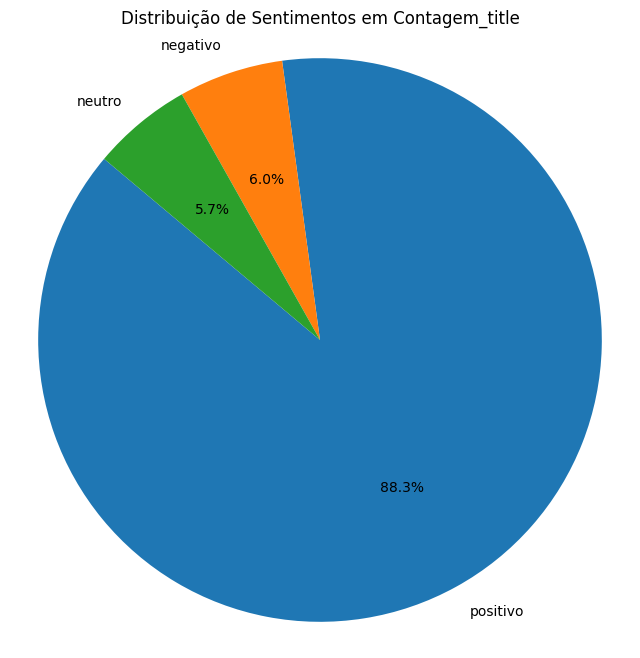

In [ ]:
# Gráfico dos sentimentos

# Extraia os sentimentos e suas contagens da coluna "Contagem_title"
sentimentos = contagem_total['Sentimento']
contagens_title = contagem_total['Contagem_title']

# Crie um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagens_title, labels=sentimentos, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Sentimentos em Contagem_title')
plt.axis('equal')  # Garante que o gráfico seja um círculo

# Exiba o gráfico
plt.show()

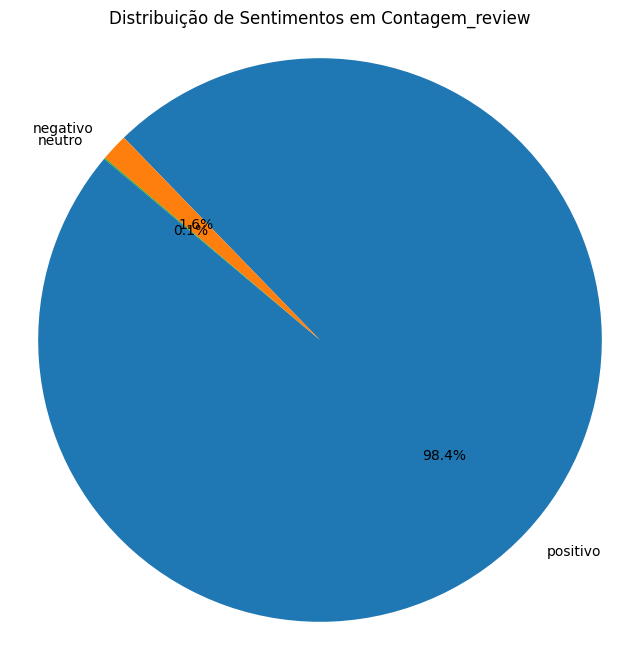

In [ ]:
# Extraia os sentimentos e suas contagens da coluna "Contagem_title"
sentimentos = contagem_total['Sentimento']
contagens_title = contagem_total['Contagem_review']

# Crie um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagens_title, labels=sentimentos, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Sentimentos em Contagem_review')
plt.axis('equal')  # Garante que o gráfico seja um círculo

# Exiba o gráfico
plt.show()

>**Nuvem de palavras das colunas title e review**

---



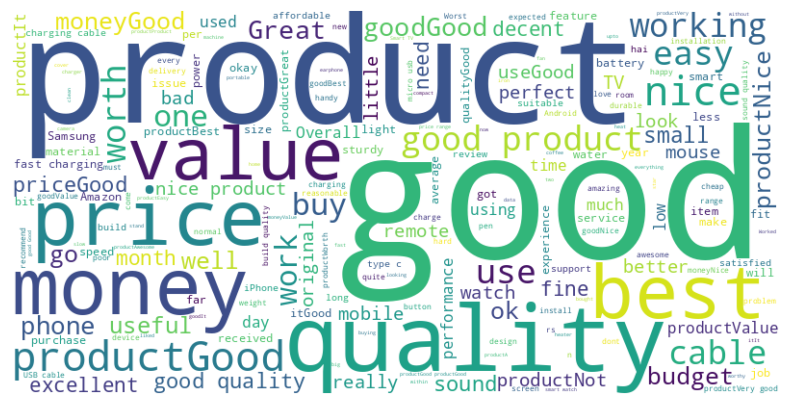

In [ ]:
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()

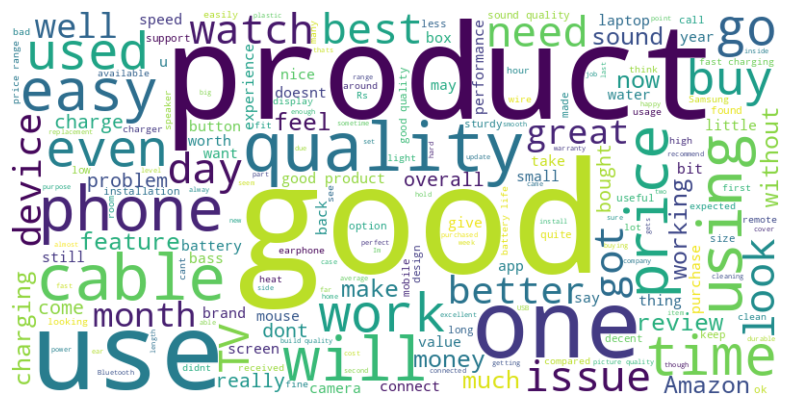

In [ ]:
wordcloud_review = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis('off')
plt.show()